In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import pickle

In [2]:
print(tf. __version__)

2.6.2


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## TensorBoard

In [4]:
log_directory = 'logs\\fit_' + datetime.datetime.now().strftime("%Y-%m-%d--%H-%M")
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [5]:
pwd

'C:\\Users\\andre\\Documents\\ML_Models\\Supervised\\Classification\\09_Artificial_Neural_Network'

tensorboard --logdir logs\fit 

http://localhost:6006/#scalars

## Import Dataset

In [6]:
df_pen = sns.load_dataset('penguins')

In [7]:
df_pen = df_pen.dropna()

In [8]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [9]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [10]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [11]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [12]:
X = pd.get_dummies(X, drop_first = True)
y = pd.get_dummies(y, drop_first = False)

In [13]:
X.head(3)


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            38.8           20.0              190.0       3950.0   
1            45.3           13.7              210.0       4300.0   
2            39.0           18.7              185.0       3650.0   

   island_Dream  island_Torgersen  sex_Male  
0             1                 0         1  
1             0                 0         0  
2             1                 0         1

In [14]:
y.head(3)

Adelie  Chinstrap  Gentoo
0       1          0       0
1       0          0       1
2       1          0       0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [16]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [17]:
X_train.shape

(233, 7)

In [18]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=3,activation='softmax'))


# For a binary classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
8/8 [==============================] - 2s 42ms/step - loss: 1.0142 - accuracy: 0.5751 - val_loss: 0.9917 - val_accuracy: 0.6200
Epoch 2/600
8/8 [==============================] - 0s 11ms/step - loss: 0.9874 - accuracy: 0.6052 - val_loss: 0.9692 - val_accuracy: 0.6700
Epoch 3/600
8/8 [==============================] - 0s 10ms/step - loss: 0.9640 - accuracy: 0.6524 - val_loss: 0.9478 - val_accuracy: 0.7300
Epoch 4/600
8/8 [==============================] - 0s 10ms/step - loss: 0.9403 - accuracy: 0.6867 - val_loss: 0.9264 - val_accuracy: 0.7300
Epoch 5/600
8/8 [==============================] - 0s 10ms/step - loss: 0.9176 - accuracy: 0.7253 - val_loss: 0.9044 - val_accuracy: 0.7300
Epoch 6/600
8/8 [==============================] - 0s 10ms/step - loss: 0.8944 - accuracy: 0.7382 - val_loss: 0.8816 - val_accuracy: 0.7500
Epoch 7/600
8/8 [==============================] - 0s 10ms/step - loss: 0.8708 - accuracy: 0.7468 - val_loss: 0.8568 - val_accuracy: 0.7500
Epoch 8/600
8/8 [===

8/8 [==============================] - 0s 14ms/step - loss: 0.2282 - accuracy: 0.9700 - val_loss: 0.2234 - val_accuracy: 1.0000
Epoch 60/600
8/8 [==============================] - 0s 11ms/step - loss: 0.2250 - accuracy: 0.9700 - val_loss: 0.2209 - val_accuracy: 1.0000
Epoch 61/600
8/8 [==============================] - 0s 10ms/step - loss: 0.2216 - accuracy: 0.9700 - val_loss: 0.2178 - val_accuracy: 1.0000
Epoch 62/600
8/8 [==============================] - 0s 10ms/step - loss: 0.2185 - accuracy: 0.9700 - val_loss: 0.2146 - val_accuracy: 1.0000
Epoch 63/600
8/8 [==============================] - 0s 12ms/step - loss: 0.2155 - accuracy: 0.9700 - val_loss: 0.2114 - val_accuracy: 1.0000
Epoch 64/600
8/8 [==============================] - 0s 11ms/step - loss: 0.2125 - accuracy: 0.9700 - val_loss: 0.2087 - val_accuracy: 1.0000
Epoch 65/600
8/8 [==============================] - 0s 10ms/step - loss: 0.2098 - accuracy: 0.9700 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 66/600
8/8 [========

8/8 [==============================] - 0s 16ms/step - loss: 0.1194 - accuracy: 0.9957 - val_loss: 0.1177 - val_accuracy: 1.0000
Epoch 118/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1183 - accuracy: 0.9957 - val_loss: 0.1163 - val_accuracy: 1.0000
Epoch 119/600
8/8 [==============================] - 0s 12ms/step - loss: 0.1173 - accuracy: 0.9914 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 120/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1163 - accuracy: 0.9914 - val_loss: 0.1142 - val_accuracy: 1.0000
Epoch 121/600
8/8 [==============================] - 0s 17ms/step - loss: 0.1153 - accuracy: 0.9957 - val_loss: 0.1133 - val_accuracy: 1.0000
Epoch 122/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1141 - accuracy: 0.9957 - val_loss: 0.1123 - val_accuracy: 1.0000
Epoch 123/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1131 - accuracy: 0.9957 - val_loss: 0.1113 - val_accuracy: 1.0000
Epoch 124/600
8/8 [=

Epoch 175/600
8/8 [==============================] - 0s 10ms/step - loss: 0.0730 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 1.0000
Epoch 176/600
8/8 [==============================] - 0s 10ms/step - loss: 0.0725 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 1.0000
Epoch 177/600
8/8 [==============================] - 0s 13ms/step - loss: 0.0719 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 178/600
8/8 [==============================] - 0s 11ms/step - loss: 0.0713 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 179/600
8/8 [==============================] - 0s 12ms/step - loss: 0.0708 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 180/600
8/8 [==============================] - 0s 10ms/step - loss: 0.0702 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 1.0000
Epoch 181/600
8/8 [==============================] - 0s 10ms/step - loss: 0.0697 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 

Epoch 233/600
8/8 [==============================] - 0s 15ms/step - loss: 0.0476 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 234/600
8/8 [==============================] - 0s 11ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 235/600
8/8 [==============================] - 0s 13ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 236/600
8/8 [==============================] - 0s 12ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 237/600
8/8 [==============================] - 0s 20ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 238/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 239/600
8/8 [==============================] - 0s 15ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 

Epoch 291/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 292/600
8/8 [==============================] - 0s 16ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 293/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 294/600
8/8 [==============================] - 0s 16ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 295/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 296/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 297/600
8/8 [==============================] - 0s 16ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 

Epoch 349/600
8/8 [==============================] - 0s 23ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 350/600
8/8 [==============================] - 0s 22ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 351/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 352/600
8/8 [==============================] - 0s 19ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 353/600
8/8 [==============================] - 0s 27ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 354/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 355/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 

Epoch 407/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 408/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 409/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 410/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 411/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 412/600
8/8 [==============================] - 0s 20ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 413/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 

Epoch 465/600
8/8 [==============================] - 0s 19ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 466/600
8/8 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 467/600
8/8 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 468/600
8/8 [==============================] - 0s 19ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 469/600
8/8 [==============================] - 0s 20ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 470/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 471/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 

Epoch 523/600
8/8 [==============================] - 0s 21ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 524/600
8/8 [==============================] - 0s 18ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 525/600
8/8 [==============================] - 0s 34ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 526/600
8/8 [==============================] - 0s 20ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 527/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 528/600
8/8 [==============================] - 0s 17ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 529/600
8/8 [==============================] - 0s 24ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 

Epoch 581/600
8/8 [==============================] - 0s 26ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 582/600
8/8 [==============================] - 0s 27ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 583/600
8/8 [==============================] - 0s 25ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 584/600
8/8 [==============================] - 0s 28ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 585/600
8/8 [==============================] - 0s 31ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 586/600
8/8 [==============================] - 0s 21ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 587/600
8/8 [==============================] - 0s 62ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 

## Evaluation

In [20]:
model.history.history

{'loss': [1.014245629310608,
  0.9874083399772644,
  0.9640406370162964,
  0.9402735829353333,
  0.9175538420677185,
  0.894413411617279,
  0.870796263217926,
  0.8464851975440979,
  0.8197606801986694,
  0.7923303842544556,
  0.7625499367713928,
  0.7319774627685547,
  0.6999807357788086,
  0.6677291393280029,
  0.6374019384384155,
  0.6076314449310303,
  0.5821143388748169,
  0.5590055584907532,
  0.5378987193107605,
  0.5186278820037842,
  0.5004635453224182,
  0.4836018979549408,
  0.46856245398521423,
  0.4539562165737152,
  0.4409276247024536,
  0.42881831526756287,
  0.4176534116268158,
  0.40742605924606323,
  0.39748454093933105,
  0.3882491886615753,
  0.3799588978290558,
  0.3717937171459198,
  0.36388203501701355,
  0.3566003143787384,
  0.34960606694221497,
  0.34271201491355896,
  0.3358807861804962,
  0.32923784852027893,
  0.3231084942817688,
  0.3164535462856293,
  0.31044626235961914,
  0.3046657145023346,
  0.29952898621559143,
  0.293701171875,
  0.2886962890625,
  

<AxesSubplot:>

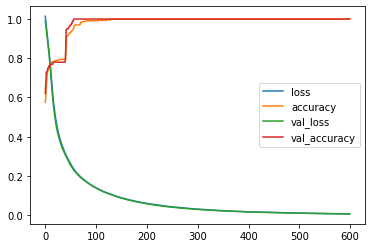

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [22]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [25]:
training_score

[0.006506654433906078, 1.0]

In [26]:
test_score

[0.006476934999227524, 1.0]

In [37]:
test_predictions = model.predict(X_test)
test_predictions = pd.DataFrame(test_predictions, columns = y.columns)
# test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
# test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [38]:
test_predictions

Adelie     Chinstrap        Gentoo
0   1.694356e-02  9.701512e-01  1.290517e-02
1   1.694356e-02  9.701512e-01  1.290517e-02
2   1.000000e+00  4.841318e-14  4.088413e-12
3   1.668745e-07  1.969669e-06  9.999979e-01
4   9.999990e-01  4.011033e-07  6.252506e-07
..           ...           ...           ...
95  1.819667e-07  2.166381e-06  9.999976e-01
96  1.000000e+00  4.273508e-14  3.692045e-12
97  1.000000e+00  2.024651e-17  1.443394e-14
98  9.934213e-08  1.113611e-06  9.999988e-01
99  3.111459e-07  3.907308e-06  9.999958e-01

[100 rows x 3 columns]

In [40]:
test_predictions.max(axis = 1)

0     0.970151
1     0.970151
2     1.000000
3     0.999998
4     0.999999
        ...   
95    0.999998
96    1.000000
97    1.000000
98    0.999999
99    0.999996
Length: 100, dtype: float32

In [ ]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [ ]:
pred_df.head()

In [ ]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [ ]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

## Early Stopping

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=3,activation='softmax'))


# For a binary classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board]
          )

## Evaluation

In [ ]:
model.history.history

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [ ]:
model.metrics_names

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

In [ ]:
test_score

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [ ]:
pred_df.head()

In [ ]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [ ]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

## Adding in DropOut Layers

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=3,activation='softmax'))


# For a binary classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

## Evaluation

In [ ]:
model.history.history

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [ ]:
model.metrics_names

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

In [ ]:
test_score

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [ ]:
pred_df.head()

In [ ]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

In [ ]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [ ]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

## Saving and Loading a Model

In [ ]:
# from tensorflow.keras.models import load_model

In [ ]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
# later_model = load_model('my_model.h5')